<a href="https://colab.research.google.com/github/ashish244co/SHALA2020/blob/master/Ashish_Kashav_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)

In [3]:
data.iloc[:,1]

0     0.019404
1     0.043634
2     0.023797
3     0.444340
4     0.578160
        ...   
95    0.527331
96    0.080760
97    0.231057
98    0.102720
99    0.516642
Name: 1, Length: 100, dtype: float64

# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [0]:
def fun(x,lamb):
  return lamb*np.exp(-lamb*x)

In [0]:
y1=fun(data.iloc[:,1],1)
y2=fun(data.iloc[:,1],2)

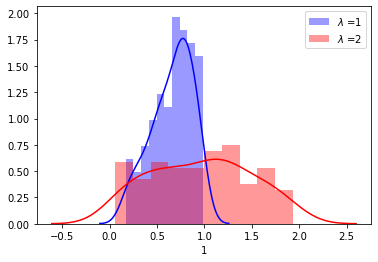

In [28]:
sns.distplot(y1,bins=10,color='blue')
sns.distplot(y2,bins=10,color='red')
plt.legend([r'$ \lambda $' +' =1',r'$ \lambda $'+' =2'])

In [0]:
likelihood1=np.prod(y1)  
likelihood2=np.prod(y2)  
loglikelihhood1=np.sum(np.log(y1))
loglikelihhood2=np.sum(np.log(y2))

In [9]:
print('Likehood for lambda1: ',likelihood1)
print('Likehood for lambda2: ',likelihood2)
print('LogLikehood for lambda1: ',loglikelihhood1)
print('LogLikehood for lambda2: ',loglikelihhood2)

Likehood for lambda1:  5.52106601597132e-22
Likehood for lambda2:  3.864074103681613e-13
LogLikehood for lambda1:  -48.94830108538966
LogLikehood for lambda2:  -28.58188411478479


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

Find the parameters required to compute the T statistic

In [0]:
data1=sample1.iloc[:,1]
data2=sample2.iloc[:,1]

mean1,mean2=np.mean(data1),np.mean(data2)
stderr1, stderr2 = stats.sem(data1), stats.sem(data2)
sed = np.sqrt(stderr1**2.0 + stderr2**2.0)
t_stat = (mean1 - mean2) / sed

In [12]:
t_stat

-16.820688596866056

Find the degrees of freedom to get the critical value

In [0]:
dof = len(sample1)+ len(sample2)- 2
c = stats.t.ppf(0.95, dof)

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [14]:
if(abs(t_stat)<=c):
  print("NO")
else:
  print("YES")

YES


Plot the distribution of both the samples to visualize

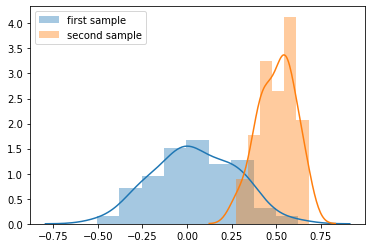

In [15]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()